# Linear regression

## Problem definition

In speech processing and elsewhere, a frequently appearing task is to
make a prediction of an unknown vector *y* from available observation
vectors *x*. Specifically, we want to have an estimate $ \hat y =
f(x) $ such that $ \hat y \approx y. $ In particular, we will
focus on *linear estimates* where $ \hat y=f(x):=A^T x, $ and where
*A* is a matrix of parameters. The figure on the right illustrates a
linear model, where the input sample pairs *(x,y)* are modelled by a
linear model  $ \hat y \approx ax. $


![linreg.png](attachments/155465953.png) 


## The minimum mean square estimate (MMSE)

Suppose we want to minimise the squared error of our estimate on
average. The estimation error is $ e=y-\hat y $ and the squared
error is the *L_{2}*-norm of the error, that is, $
\left\|e\right\|^2 = e^T e $ and its mean can be written as the
expectation $ E\left[\left\|e\right\|^2\right] =
E\left[\left\|y-\hat y\right\|^2\right] =
E\left[\left\|y-A^T x\right\|^2\right]. $ Formally, the
minimum mean square problem can then be written as

$$ \min_A\, E\left[\left\|y-A^T x\right\|^2\right]. $$

This can in generally not be directly implemented because we have the
abstract expectation-operation in the middle.

*(Advanced derivation begins)* To get a computational model, first note
that the error expectation can be written in terms of the mean of a
sample of vector *e_{k}* as

$$ E\left[\left\|e\right\|^2\right] \approx \frac1N
\sum_{k=1}^N \left\|e_k\right\|^2 = \frac1N {\mathrm{tr}}(E^T
E), $$

where $ E=\left[e_1,\,e_2,\dotsc,e_N\right] $ and *tr()* is
the matrix trace. To minimize the error energy expectation, we can then
set its [derivative](https://en.wikipedia.org/wiki/Matrix_calculus) to
zero

$$ 0 = \frac{\partial}{\partial A} \frac1N {\mathrm{tr}}(E^T E) =
\frac1N\frac{\partial}{\partial A} {\mathrm{tr}}((Y-A^TX)^T
(Y-A^TX)) = \frac1N(Y-A^T X)X^T $$

where the observation matrix is $
X=\left[x_1,\,x_2,\dotsc,x_N\right] $ and the desired output
matrix is $ Y=\left[y_1,\,y_2,\dotsc,y_N\right] $ . *(End of
advanced derivation)*

It follows that the optimal weight matrix *A* can be solved as

$$ \boxed{A = \left(XX^T\right)^{-1}XY^T = X^\dagger Y^T}, $$

where the superscript $ \dagger $ denotes the [Moore-Penrose
pseudo-inverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_pseudoinverse).

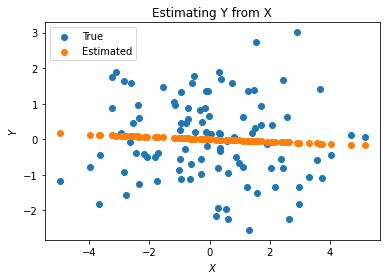

In [1]:
import numpy as np
import matplotlib.pyplot as plt

B = np.random.randn(2,2)
x = np.matmul(np.random.randn(100,2),B)

X = x[:,0:1].T
Y = x[:,1:2].T

A = np.matmul(
    np.linalg.inv(
        np.matmul(X,X.T) ),
    np.matmul(X,Y.T) )

Yhat = np.matmul(A,X)

plt.scatter(X,Y,label='True')
plt.scatter(X,Yhat,label='Estimated')
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.title('Estimating Y from X')
plt.legend()
plt.show()

### Estimates with a mean parameter

Suppose that instead of an estimate $ \hat y=A^T x $ , we want to
include a mean vector in the estimate as $ \hat y=A^T x + \mu $ .
While it is possible to derive all of the above equations for this
modified model, it is easier to rewrite the model into a similar form as
above with

$$ \hat y=A^T x + \mu = \begin{bmatrix} \mu^T \\ A^T
\end{bmatrix} \begin{bmatrix} 1 \\ x \end{bmatrix} := A'^T x'. $$

That is, we can extend *x* by a single 1, (the observation *X* similarly
with a row of constant 1s), and extend *A* to include the mean vector.
With this modifications, the above Moore-Penrose pseudo-inverse can
again be used to solve the modified model.


### Estimates with linear equality constraints

*(Advanced derivation begins)*

In practical situations we often have also linear constraints, such as
$ C^T A = B $ , which is equivalent with $ C^T A - B = 0. $ The
modified programming task is then

$$ \min_A\, E\left[\left\|y-A^T
x\right\|^2\right]\quad\text{such that}\quad C^T A - B = 0. $$

For simplicity, let us consider only scalar estimation, where instead of
vector *y*, as well as matrices *A, B* and *C*, respectively, we have
scalar *θ* as well as vector *a, b* and *c *and the optimization problem
is

$$ \min_a\, E\left[\left\|\theta-a^T
x\right\|^2\right]\quad\text{such that}\quad c^T a - b = 0. $$

Such constraints can be included into the objective function using the
method of [Lagrange
multipliers](https://en.wikipedia.org/wiki/Lagrange_multiplier) such
that the modified objective function is

$$ \eta(a,g) = E\, \left[\left\\|\theta - a^T
x\right\|^2\right] - 2 \left[ g^T \left(c^T a -
b\right)\right]. $$

A heuristic explanation of this objective function is based on the fact
the *g* is a free parameter. Since its value can be anything, then $
c^T a - b $ must be zero, because otherwise the output value of the
objective function could be anything. That is, when optimizing with
respect to *a*, we find the minimum of the mean square error, while
simultaneously satisfying the constraint.

The objective function can further be rewritten as

$$ \begin{split} \eta(a,g) & = E\, \left[\left(\theta - a^T
x\right)\left(\theta - a^T x\right)^T\right] - 2 \gamma
\left(c^T a - \beta\right) \\& = E\, \left[\theta^2 - 2\theta
x^T a + a^T xx^T a\right] - 2 \gamma \left(c^T a - \beta\right)
\\& = \sigma_\theta^2 + a^T R_x^T a - 2 \gamma \left(c^T a -
\beta\right) \\& = \begin{bmatrix} a^T & \gamma \end{bmatrix}
\begin{bmatrix} R_x & -c \\ -c^T & 0 \end{bmatrix} \begin{bmatrix}
a \\ \gamma \end{bmatrix} -2 \begin{bmatrix} 0 & \beta^T
\end{bmatrix} \begin{bmatrix} a \\ \gamma \end{bmatrix} +
\sigma_\theta^2 \\& = \begin{bmatrix} a^T & \gamma-\beta
\end{bmatrix} \begin{bmatrix} R_x & -c \\ -c^T & 0 \end{bmatrix}
\begin{bmatrix} a \\ \gamma-\beta \end{bmatrix} + \text{constant}
\\& := (a'-\mu)^T R' (a'-\mu) + \text{constant} . \end{split} $$

where  $ R_x = E[xx^T] $ and "*constant"* refers to a constant
which does not depend on *a* or γ.

In other words, with a straightforward approach, equality constraints
can in general also be merged into a quadratic form. We can therefore
reduce constrained problems to unconstrained problems which can be
easily solved.

*Inequality* constraints can be reduced to quadratic forms with similar
steps as follows. Suppose we have a task  $ \min f(x)\,\text{such
that}\,x \geq b. $ We would then first solve the unconstrained
problem $ \min f(x) $ and check whether the constraint is
satisfied. If not, then the inequality constraint is "active", that is,
we must have *x=b*. We can then rewrite the inequality constraint as an
equality constraint and solve the problem as above.

In the case that we have multiple constraints over multiple dimensions,
we can keep merging them one by one until we have an entire
unconstrained programming problem.

*(Advanced derivation ends)*


## Some applications

-   [Linear prediction](Linear_prediction) in modelling of the spectral
    envelope of speech
-   Noise attenuation with Wiener filtering


## Discussion

Linear regression is just about the simplest thing you can do to model
data. If that works then it's perfect! Especially for estimating
low-dimensional from high-dimensional data, linear estimates can be very
useful. In any case, it is always a good approach to start modelling
with the simplest possible model, which usually is a linear model. If
nothing else, that gives a good baseline. The first figure on this page
demonstrates a case where a linear model does do a decent job at
modelling the data.

Naturally there are plenty of situations where linear models are
insufficient, such as when the data

-   follows non-linear relationships
-   has discontinuities or when the data
-   contains multiple classes with different properties.

Moreover, in many cases we are not interested in modelling the average
signal, but to recreate a signal which contains all the complexity of
the original signal. Say, if we want to synthesize speech, then "average
speech" can sound dull. Instead, we would like to reproduce all the
colorfulness and expressiveness of a natural speaker. A model of the
statistical distribution of the signal can then be more appropriate,
such as the [Gaussian mixture model
(GMM)](Gaussian_mixture_model_GMM_). 

Another related class of models are [Sub-space
models](Sub-space_models), where the input signal is modeled in a
lower-dimensional space such that dimensions related to background noise
are cancelled and the desired speech signal is retained.